# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

## **2: Ask Questions**

### Bhuvan Thirwani:

#### **Question 1**:

##### ***How does driving experience, gender, educational level affect the severity of accidents? What is the corelation between total casualties & accident's severity***
#### **Hypothesis**
##### **There should be no effect of sex of the driver on casualties and accident severity. Higher education must have low casualities and less severity. Higher driving experience must have lower casualities & less severity**

#### **Question 2**:
##### **Analyzing how the fatality ratio is related with various factors such as light conditions, weather conditions, type of collision & day of the week in traffic accidents. Finding patterns and correlations which can suggest road safety strategies.**

#### **Hypothesis**
##### **Dark Lighting, Rainy Weather Conditions should have more fatal rate. On Busy days, fatal ratio should be high as outside is overcrowded & Pedestrian should have the highest fatal ratio.**

#### Harshit Malpani: 50608809

#### Question 1:
What vehicles should the authorities focus more on to reduce the cases of road accidents and the severity of the road accidents

#### Question 2:
Does the service period of the vehicle and ownership of the vehicle have any correlation with the accidents

#### Piyush Gulhane:

#### Question 1:

#### Question 2:

## **3: Data Retrieval**

The dataset has been taken from KAGGLE. For this task, we have uploaded a copy of the dataset to a github repository and downloading the data from the github repository directly to the dataframe

In [747]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve, precision_score, recall_score, auc, precision_recall_curve, confusion_matrix, matthews_corrcoef, ConfusionMatrixDisplay
import pickle
import shap
from sklearn.preprocessing import LabelEncoder
import time
from datetime import datetime
from collections import Counter, defaultdict
import copy
import numpy as np

warnings.filterwarnings('ignore')
dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [748]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [749]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [752]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation

In [754]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers

In [756]:
# code for outliers handling

numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
# Remove outliers from both columns
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

# Check the shape of the DataFrame after removal
print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [758]:
# Find the number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3923
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                306
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [759]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [760]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [762]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [764]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [766]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering

In [768]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_dat = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


#### 9) One Hot Encoding

In [770]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3,
        'friday': 4, 'saturday': 5, 'sunday': 6, 'unknown': -1
    },
    'Age_band_of_driver': {
        'under 18': 0, '18-30': 1, '31-50': 2, '51 and over': 3, 'unknown': -1
    },
    'Educational_level': {
        'illiterate': 0, 'writing & reading': 1, 'elementary school': 2,
        'junior high school': 3, 'high school': 4, 'above high school': 5,
        'unknown': -1
    },
    'Driving_experience': {
        'no licence': 0, 'below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'above 10yr': 4, 'unknown': -1
    },
    'Road_surface_conditions': {
        'dry': 0, 'wet or damp': 1, 'snow': 2, 'flood over 3cm. deep': 3, 'unknown': -1
    },
    'Age_band_of_casualty': {
        'under 18': 0, '18-30': 1, '31-50': 2, 'over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'unknown': -1
    },
    'Accident_severity': {
        'slight injury': 1, 'serious injury': 2, 'fatal injury': 3, 'unknown': -1
    }
}

def apply_onehot_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)
    return df

cleaned_dataset = apply_onehot_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no distancing,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,False
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,False,True,False,False,False
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,False
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,False
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,False,True,False,False,False


#### 10) Ordinal Encoding

In [772]:
def apply_ordinal_encoding(df, encoding_dict, ordinal_mappings):
    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            # Apply ordinal encoding using a mapping dictionary
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")
    return df

cleaned_dataset = apply_ordinal_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_unknown,Day_of_week_ordinal,Age_band_of_driver_ordinal,Educational_level_ordinal,Driving_experience_ordinal,Service_year_of_vehicle_ordinal,Road_surface_conditions_ordinal,Age_band_of_casualty_ordinal,Casualty_severity_ordinal,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,0,1,5,2,4,0,-1,-1,1
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,0,2,3,5,3,0,-1,-1,1
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,0,1,3,2,-1,0,2,0,2
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,6,1,3,4,-1,0,1,0,1
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,6,1,3,3,3,0,-1,-1,1


In [773]:
for column, mapping in ordinal_mappings.items():
    if column in cleaned_dataset.columns:
        # Get unique values in the dataset for the column
        unique_values = set(cleaned_dataset[column].unique())
        # Get expected values from the mapping dictionary
        expected_values = set(mapping.keys())
        # Find any values in the dataset that are not in the expected mappings
        unexpected_values = unique_values - expected_values

        # Print results
        if unexpected_values:
            print(f"Column '{column}' has unexpected values: {unexpected_values}", cleaned_dataset[column].unique(), expected_values)
        else:
            print(f"Column '{column}' matches the expected values.")
    else:
        print(f"Column '{column}' not found in the dataset.")

Column 'Day_of_week' matches the expected values.
Column 'Age_band_of_driver' matches the expected values.
Column 'Educational_level' matches the expected values.
Column 'Driving_experience' matches the expected values.
Column 'Service_year_of_vehicle' matches the expected values.
Column 'Road_surface_conditions' matches the expected values.
Column 'Age_band_of_casualty' matches the expected values.
Column 'Casualty_severity' matches the expected values.
Column 'Accident_severity' matches the expected values.


## **5: Exploratory Data Analysis (EDA)**

### Bhuvan Thirwani:

### Question 1:
 **How does driving experience, gender, educational level affect the severity of accidents? What is the corelation between total casualties & accident's severity?**
### **Hypothesis**
#### **There should be no effect of sex of the driver on casualties and accident severity. Higher education must have low casualities and less severity. Higher driving experience must have lower casualities & less severity**

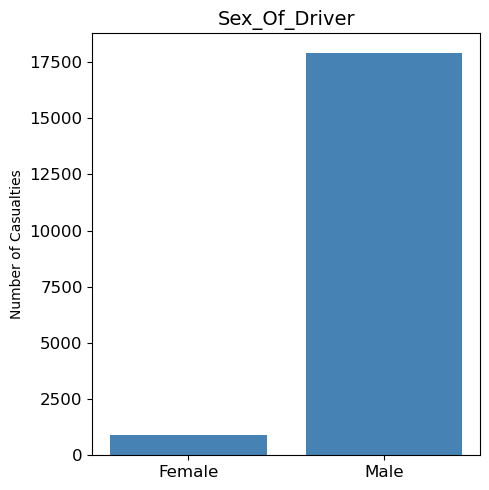

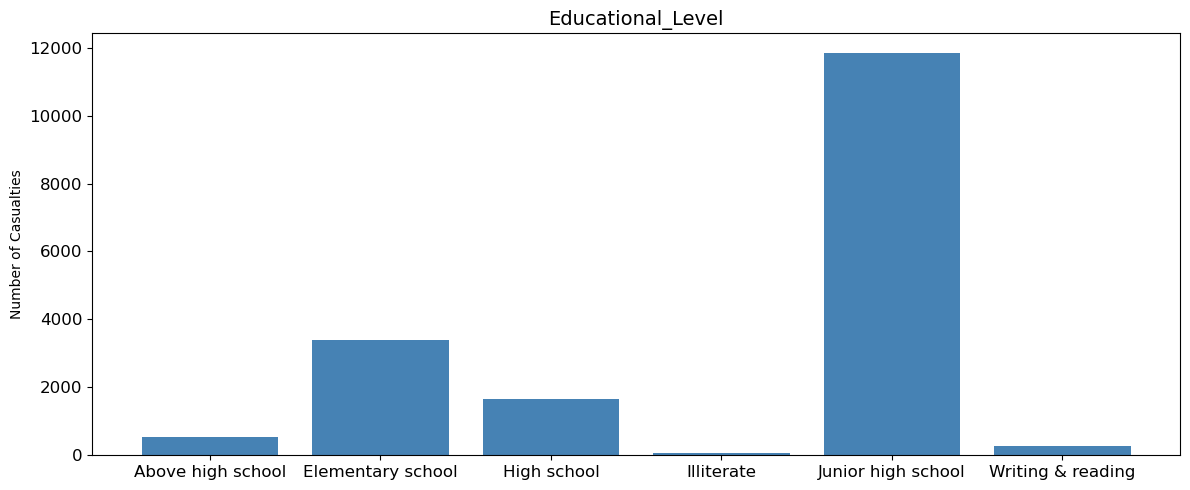

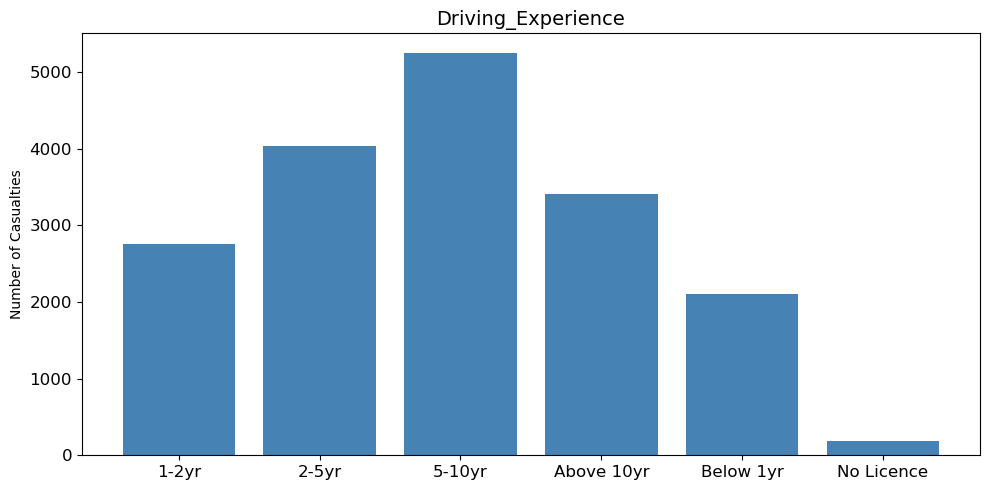

In [777]:
df=dataset
plt.figure(figsize=(5, 5))
col = 'Sex_of_driver'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
col = 'Educational_level'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
col = 'Driving_experience'
df_known = df[~df[col].str.lower().isin(['unknown'])]
plot_data = df_known.groupby(col)['Number_of_casualties'].sum().reset_index()
plt.bar(plot_data[col], plot_data['Number_of_casualties'], color='steelblue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(col.title(), fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

### **Outcomes and Insights**

#### **Driving Experience**
* **Observation:** The bar chart shows that drivers with 5-10 years of experience are involved in the most accidents, while those without a license have the fewest.
* **Hypothesis Testing:** Contrary to the hypothesis, higher driving experience does not necessarily correlate with fewer casualties or less severity. This suggests that other factors might influence accident outcomes.

#### **Educational Level**
* **Observation:** The majority of drivers involved in accidents have a junior high school education. Higher education levels seem to have fewer casualties.
* **Hypothesis Testing:** This supports the hypothesis that higher education correlates with fewer casualties, possibly due to better risk assessment and decision-making skills.

#### **Sex of Driver**
* **Observation:** A significantly higher number of male drivers are involved in accidents compared to female drivers.
* **Hypothesis Testing:** The data challenges the hypothesis that sex has no effect on casualties and accident severity. Male drivers appear more frequently in accident data, suggesting gender may play a role.

### **Feature Engineering**
* **Observation:** Almost all the categorical variables have a biased group length.
* **Learning:** We will be using Oversampling methods for making the groups rows count comparable for each column

## Question 2:
### **Analyzing how the fatality ratio is related with various factors such as light conditions, weather conditions, type of collision & day of the week in traffic accidents. Finding patterns and correlations which can suggest road safety strategies.**

### **Hypothesis**
#### **Dark Lighting, Rainy Weather Conditions should have more fatal rate. On Busy days, fatal ratio should be high as outside is overcrowded & Pedestrian should have the highest fatal ratio.**

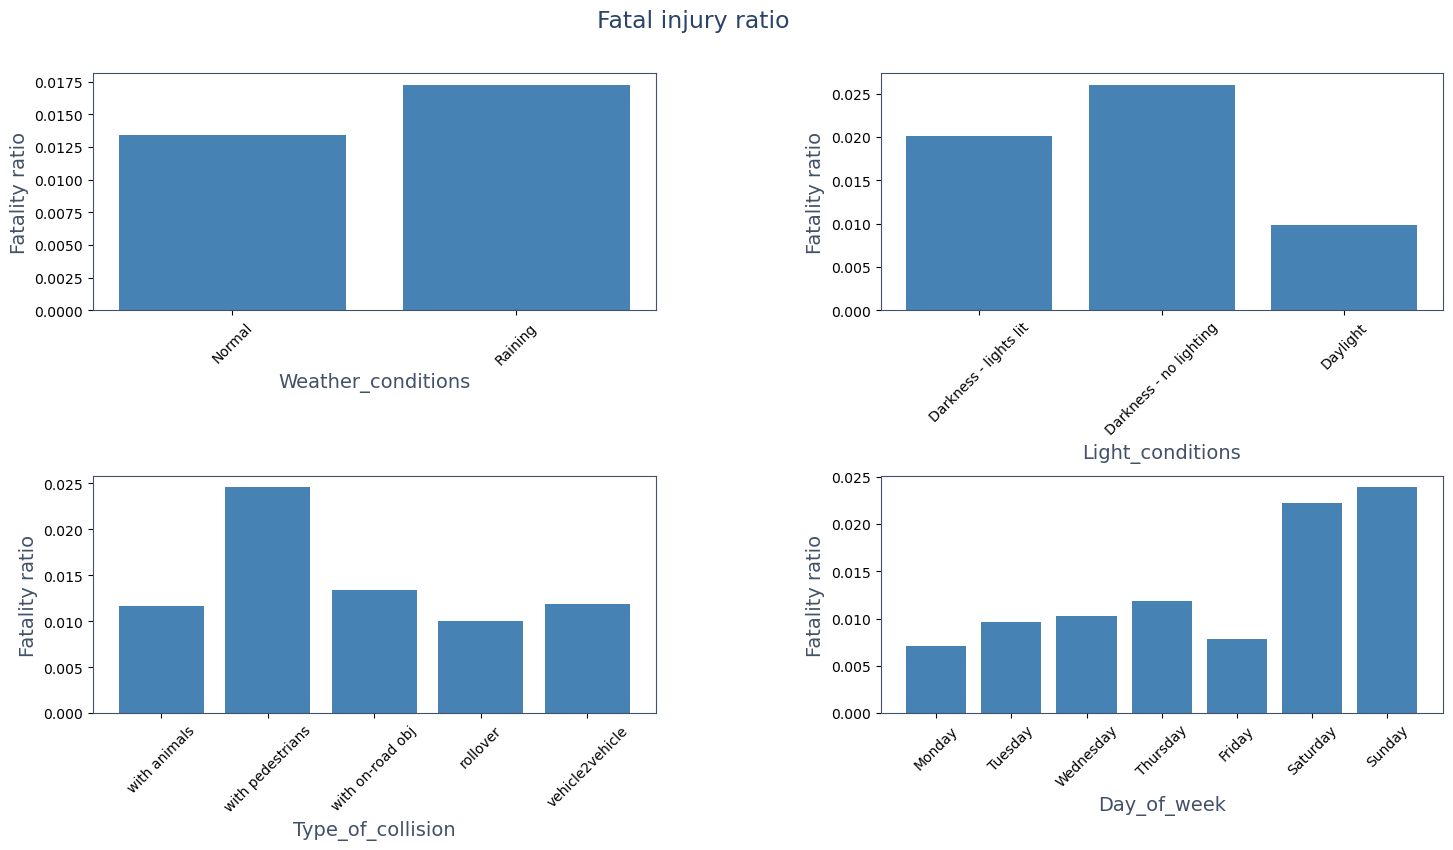

In [780]:
df=dataset
def calculate_fatility_ratio(column, df=dataset, sort=False):
    df = df[df[column] != 'Unknown']
    _df = df.groupby(['Accident_severity', column]).Time.count().reset_index()
    rowlist = [row for row in _df[column]]
    time_sum = []
    for row in rowlist:
        time_sum.append(_df.loc[_df[column] == row].Time.sum())

    _df['time_sum'] = time_sum
    _df['fatal_ratio'] = _df['Time'] / _df['time_sum']
    df_with_fatal_ratio = _df.loc[_df.Accident_severity == 'Fatal injury']
    if sort:
        df_with_fatal_ratio = df_with_fatal_ratio.sort_values(by='fatal_ratio')
    return df_with_fatal_ratio

df_with_fatal_ratio = calculate_fatility_ratio('Type_of_collision', df, sort=True)

def plot_fatal_graphs(ax, column, red_list, df, order=None, custom_labels=None):
    fatal_data = calculate_fatility_ratio(column, df)

    if order is not None:
        fatal_data[column] = pd.Categorical(fatal_data[column], categories=order, ordered=True)
        fatal_data = fatal_data.sort_values(column)

    x_labels = fatal_data[column]
    y_values = fatal_data['fatal_ratio']

    bars = ax.bar(x_labels, y_values, color='steelblue')

    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45)

    if custom_labels is not None:
        ax.set_xticks(range(len(custom_labels)))
        ax.set_xticklabels(custom_labels, rotation=45)
    else:
        ax.set_xticks(range(len(x_labels)))
        ax.set_xticklabels(x_labels, rotation=45)

    ax.set_xlabel(column, fontsize=14, color='#425169')
    ax.set_ylabel('Fatality ratio', fontsize=14, color='#425169')
    ax.spines['bottom'].set_color('#425169')
    ax.spines['left'].set_color('#425169')
    ax.spines['top'].set_color('#425169')
    ax.spines['right'].set_color('#425169')

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
plt.suptitle("Fatal injury ratio", fontsize=17, color='#2c4369')

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plot_fatal_graphs(axs[0, 0], 'Weather_conditions', [1], df)
plot_fatal_graphs(axs[0, 1], 'Light_conditions', [1], df)
plot_fatal_graphs(axs[1, 0], 'Type_of_collision', [1], df, custom_labels=['with animals', 'with pedestrians', 'with on-road obj', 'rollover', 'vehicle2vehicle'])
plot_fatal_graphs(axs[1, 1], 'Day_of_week', [-1, -2], df, order=day_order)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, wspace=0.4, hspace=0.7)
plt.show()

#### **Insights from Visualizations**

##### **Fatal Injury Ratio for different categories**

###### **Number of Vehicles Involved:**
* Accidents involving fewer vehicles tend to have higher fatality ratios.

###### **Light Conditions:**
* Darkness with no lighting has a high fatality ratio which indicates poor visibility can be a risk factor.

###### **Weather Conditions:**
* Rainy conditions correlate with higher fatality ratios compared to normal weather.

###### **Type of Collision:**
* Collisions with pedestrians and vehicle with vehicle have the highest fatality ratios.

###### **Day of Week:**
* Saturdays and Sundays shows higher fatality ratios which suggests weekends have more severe accidents.

#### **Recommendations for Feature Engineering**

##### **Feature Selection and Transformation**
* **Select Relevant Features:** We should prioritize features like Light_conditions, number of vehicles involved and Type_of_collision due to their strong correlation with fatality ratios.
* **Create New Features:** Develop a composite feature for risk assessment combining Light_conditions and Weather_conditions to capture environmental risk factors.

#### **Conclusion**
##### **Our Hypothesis is 100% correct.**

# **Phase 2**

## **Task 2.1**: 
### Apply at least 2 different significant and relevant algorithms (ML, MR, and/or statistical models) to your problems and create visualizations for the results. At least 1 problem needs to use algorithms from outside of class. Algorithms discussed in class are: Linear Regression, k-Means, k-NN, Naive Bayes, Logistic Regression and Decision Tree. The outside algorithms can come from the class textbooks, or other.

### **Task 2.1.1:** 
#### Apply at least 2 different significant and relevant algorithms
#### So I have used 4 ML Algorithms.
#### **Gradient Boost Algorithm, Decision Trees, KNN, Extra Trees Classifier**
#### **Reason For Picking these algorithms:**
##### 1. **Gradient Boosting:** It is a general boosting algorithm that builds multiple learners while optimizing one learner at a time.As a result of this methodology, Gradient Boosting can address complex patterns in data, resulting in highly effective classifier models.Gradient Boosting is thus appropriate for imbalanced data. It sequentially corrects mistakes, which is especially helpful in correctly classifying accident severity condidates. 
##### https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
##### 2. **Decision Trees:** Decision Trees provide easy-to-understand rules and feature importance insights.Although the performance was moderate compared to the other models, Decision Trees help interpret feature contributions in accident severity and act as a baseline for model comparison.
##### https://scikit-learn.org/1.5/modules/tree.html#decision-trees
##### 3. **KNN:** KNN works well for smaller datasets or cases with fewer distinguishing patterns. Despite being sensitive to class imbalance, KNN serves as a useful comparison for model performance, especially for understanding how proximity-based classification can capture patterns in accident data. But this weakness is being take cared in the code.
##### https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
##### 4. **Extra Trees Classifier (ETC):** This ensemble model, similar to Random Forest, is highly effective for classification tasks, especially with datasets having complex interactions.It improves model robustness through random sampling and has high accuracy on your dataset, demonstrated by its optimal results.
##### https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

#### **Task 2.1.1.1:**
#### Before going forward, let discuss our problem statement once again:
#### **Problem Statement 1: How does driving experience, gender, educational level affect the severity of accidents?**
#### **Problem Statement 2: Analyzing how the fatality is related with various factors such as light conditions, weather conditions, type of collision & day of the week in traffic accidents. Finding patterns and correlations which can suggest road safety strategies.**

#### **Task 2.1.1.2:** Feature Selection for training the model, Some Data Cleaning too - In this case, Label Encoding for Target Variable - Accident_severity

In [787]:
target = 'Accident_severity'
features = [
    'Time_of_day', 'Sex_of_driver_male', 'Sex_of_driver_unknown', 'Vehicle_driver_relation_other',
    'Vehicle_driver_relation_owner', 'Vehicle_driver_relation_unknown', 'Type_of_vehicle_bajaj',
    'Type_of_vehicle_bicycle', 'Type_of_vehicle_long lorry', 'Type_of_vehicle_lorry (11 - 40 q)',
    'Type_of_vehicle_lorry (41 - 100 q)', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_other',
    'Type_of_vehicle_pick up upto 10q', 'Type_of_vehicle_public (12 seats)',
    'Type_of_vehicle_public (13 - 45 seats)', 'Type_of_vehicle_public (> 45 seats)',
    'Type_of_vehicle_ridden horse', 'Type_of_vehicle_special vehicle', 'Type_of_vehicle_stationwagen',
    'Type_of_vehicle_taxi', 'Type_of_vehicle_turbo', 'Type_of_vehicle_unknown', 'Defect_of_vehicle_7',
    'Defect_of_vehicle_no defect', 'Area_accident_occured_hospital areas',
    'Area_accident_occured_industrial areas', 'Area_accident_occured_market areas',
    'Area_accident_occured_office areas', 'Area_accident_occured_other',
    'Area_accident_occured_outside rural areas', 'Area_accident_occured_recreational areas',
    'Area_accident_occured_residential areas', 'Area_accident_occured_rural office areas',
    'Area_accident_occured_rural village areas', 'Area_accident_occured_school areas',
    'Area_accident_occured_unknown', 'Lanes_or_Medians_one way', 'Lanes_or_Medians_other',
    'Lanes_or_Medians_two-way (divided with broken lines road marking)',
    'Lanes_or_Medians_two-way (divided with solid lines road marking)', 'Lanes_or_Medians_undivided two way',
    'Lanes_or_Medians_unknown', 'Road_allignment_gentle horizontal curve',
    'Road_allignment_sharp reverse curve', 'Road_allignment_steep grade downward with mountainous terrain',
    'Road_allignment_steep grade upward with mountainous terrain', 'Road_allignment_tangent road with flat terrain',
    'Road_allignment_tangent road with mild grade and flat terrain', 'Road_allignment_tangent road with mountainous terrain',
    'Road_allignment_tangent road with rolling terrain', 'Road_allignment_unknown', 'Types_of_Junction_no junction',
    'Types_of_Junction_o shape', 'Types_of_Junction_other', 'Types_of_Junction_t shape',
    'Types_of_Junction_unknown', 'Types_of_Junction_x shape', 'Types_of_Junction_y shape',
    'Road_surface_type_asphalt roads with some distress', 'Road_surface_type_earth roads',
    'Road_surface_type_gravel roads', 'Road_surface_type_other', 'Road_surface_type_unknown',
    'Light_conditions_darkness - lights unlit', 'Light_conditions_darkness - no lighting',
    'Light_conditions_daylight', 'Weather_conditions_fog or mist', 'Weather_conditions_normal',
    'Weather_conditions_other', 'Weather_conditions_raining', 'Weather_conditions_raining and windy',
    'Weather_conditions_snow', 'Weather_conditions_unknown', 'Weather_conditions_windy',
    'Type_of_collision_collision with pedestrians', 'Type_of_collision_collision with roadside objects',
    'Type_of_collision_collision with roadside-parked vehicles', 'Type_of_collision_fall from vehicles',
    'Type_of_collision_other', 'Type_of_collision_rollover', 'Type_of_collision_unknown',
    'Type_of_collision_vehicle with vehicle collision', 'Type_of_collision_with train', 'Vehicle_movement_getting off',
    'Vehicle_movement_going straight', 'Vehicle_movement_moving backward', 'Vehicle_movement_other',
    'Vehicle_movement_overtaking', 'Vehicle_movement_parked', 'Vehicle_movement_reversing',
    'Vehicle_movement_stopping', 'Vehicle_movement_turnover', 'Vehicle_movement_u-turn',
    'Vehicle_movement_unknown', 'Vehicle_movement_waiting to go', 'Casualty_class_na',
    'Casualty_class_passenger', 'Casualty_class_pedestrian', 'Sex_of_casualty_male',
    'Sex_of_casualty_na', 'Work_of_casuality_employee', 'Work_of_casuality_other',
    'Work_of_casuality_self-employed', 'Work_of_casuality_student', 'Work_of_casuality_unemployed',
    'Work_of_casuality_unknown', 'Fitness_of_casuality_deaf', 'Fitness_of_casuality_normal',
    'Fitness_of_casuality_other', 'Fitness_of_casuality_unknown', 'Cause_of_accident_changing lane to the right',
    'Cause_of_accident_driving at high speed', 'Cause_of_accident_driving carelessly',
    'Cause_of_accident_driving to the left', 'Cause_of_accident_driving under the influence of drugs',
    'Cause_of_accident_drunk driving', 'Cause_of_accident_getting off the vehicle improperly',
    'Cause_of_accident_improper parking', 'Cause_of_accident_moving backward',
    'Cause_of_accident_no distancing', 'Cause_of_accident_no priority to pedestrian',
    'Cause_of_accident_no priority to vehicle', 'Cause_of_accident_other', 'Cause_of_accident_overloading',
    'Cause_of_accident_overspeed', 'Cause_of_accident_overtaking', 'Cause_of_accident_overturning',
    'Cause_of_accident_turnover', 'Cause_of_accident_unknown', 'Day_of_week_ordinal',
    'Age_band_of_driver_ordinal', 'Educational_level_ordinal', 'Driving_experience_ordinal',
    'Service_year_of_vehicle_ordinal', 'Road_surface_conditions_ordinal', 'Age_band_of_casualty_ordinal',
    'Casualty_severity_ordinal'
]
features_to_be_analyzed_for_problem_statement_1 = [
    'Educational_level_ordinal', 'Driving_experience_ordinal', 'Road_surface_conditions_ordinal'
]

features_to_be_analyzed_for_problem_statement_2 = [
    'Light_conditions_darkness - lights unlit', 'Light_conditions_darkness - no lighting',
    'Light_conditions_daylight', 'Weather_conditions_fog or mist', 'Weather_conditions_normal',
    'Weather_conditions_other', 'Weather_conditions_raining', 'Weather_conditions_raining and windy',
    'Weather_conditions_snow', 'Weather_conditions_unknown', 'Weather_conditions_windy',
    'Type_of_collision_collision with pedestrians', 'Type_of_collision_collision with roadside objects',
    'Type_of_collision_collision with roadside-parked vehicles', 'Type_of_collision_fall from vehicles',
    'Type_of_collision_other', 'Type_of_collision_rollover', 'Type_of_collision_unknown',
    'Type_of_collision_vehicle with vehicle collision', 'Type_of_collision_with train',
    'Day_of_week_ordinal'
]
X = cleaned_dataset[features]
y = cleaned_dataset[target]

In [788]:
def plt_auc_curve(ytest, y_pred_proba):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(ytest == i, y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(ytest == i, y_pred_proba[:, i])

    plt.figure(figsize=(10, 6))
    for i, color in zip(range(3), ['red', 'yellow', 'blue']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

##### **Label Encoding for Target Variable - Accident_severity**

In [790]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(class_mapping)

{'fatal injury': 0, 'serious injury': 1, 'slight injury': 2}


#### **Task 2.1.1.3:** Lets do the Training & Prediction by using 4 models

##################################################################################
Model:  Gradient_Boost
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.17      0.00      0.00       529
           2       0.84      1.00      0.91      3115

    accuracy                           0.84      3693
   macro avg       0.34      0.33      0.31      3693
weighted avg       0.74      0.84      0.77      3693



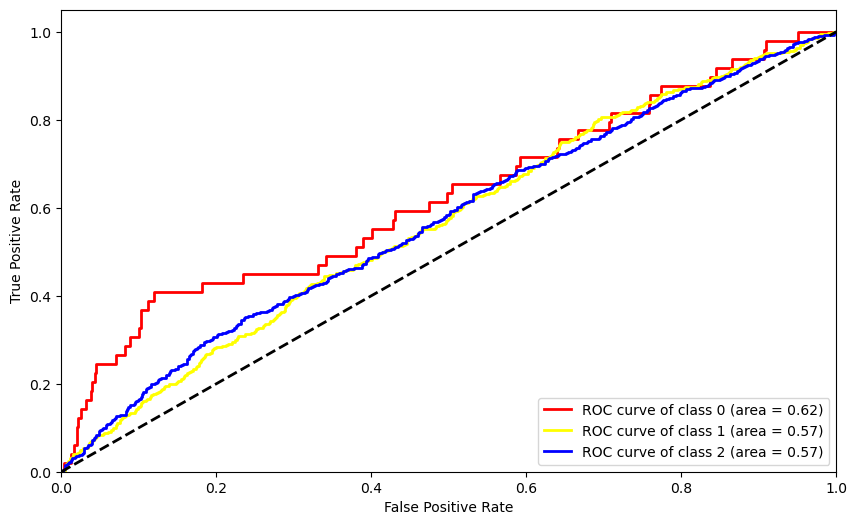

Gradient_Boost Precision: 0.735409230013141
Gradient_Boost Recall: 0.8413214189006228
Gradient_Boost F1 Score: 0.7714263940103085
Gradient_Boost macro-AUC: 0.587128618319913
Gradient_Boost Weighted-AUC: 0.5702435063688599

##################################################################################
Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.03      0.04      0.03        49
           1       0.21      0.22      0.22       529
           2       0.85      0.84      0.85      3115

    accuracy                           0.74      3693
   macro avg       0.36      0.37      0.36      3693
weighted avg       0.75      0.74      0.74      3693



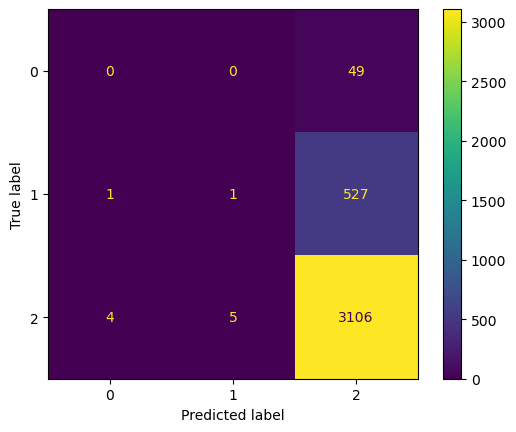

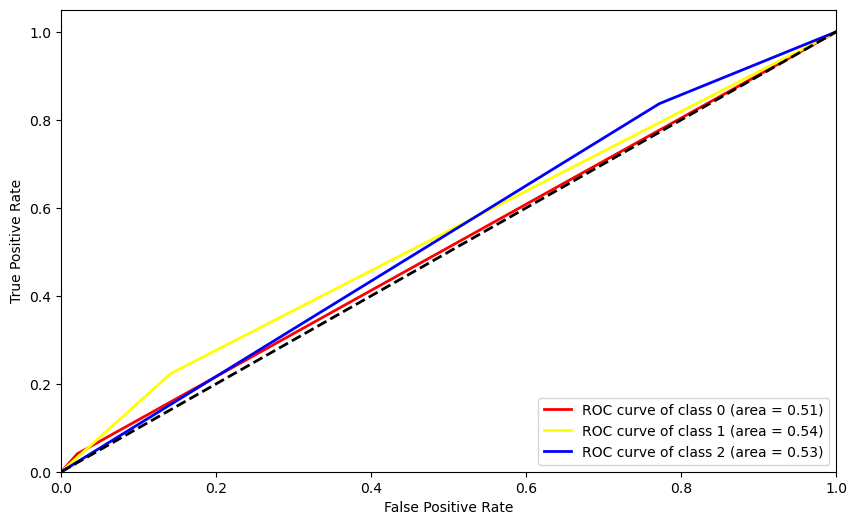

DecisionTreeClassifier Precision: 0.7505398348819164
DecisionTreeClassifier Recall: 0.7381532629298673
DecisionTreeClassifier F1 Score: 0.744218517452757
DecisionTreeClassifier macro-AUC: 0.5278844890319466
DecisionTreeClassifier Weighted-AUC: 0.5334155575270506

##################################################################################
Model:  Extratrees
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00       529
           2       0.84      1.00      0.91      3115

    accuracy                           0.84      3693
   macro avg       0.28      0.33      0.30      3693
weighted avg       0.71      0.84      0.77      3693



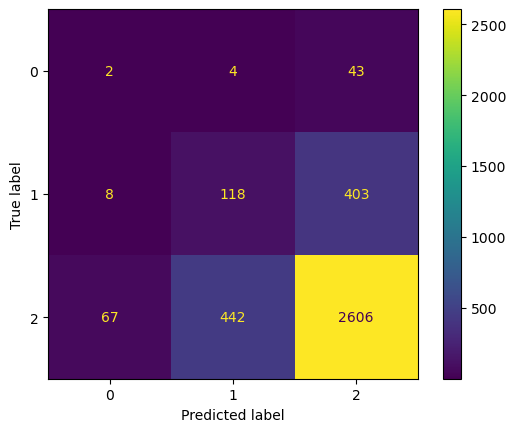

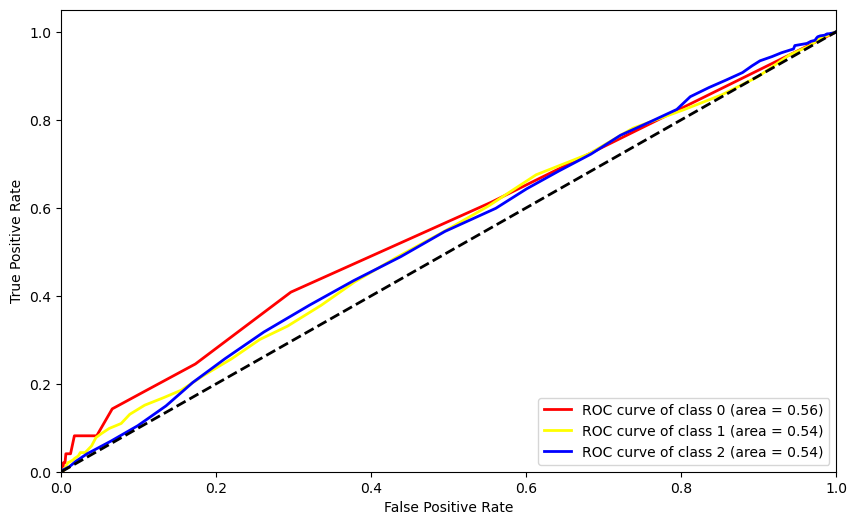

Extratrees Precision: 0.7112566301150601
Extratrees Recall: 0.8418629840238289
Extratrees F1 Score: 0.771068272635762
Extratrees macro-AUC: 0.5430771629696799
Extratrees Weighted-AUC: 0.536463663260264

##################################################################################
Model:  KNN
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00       529
           2       0.84      1.00      0.92      3115

    accuracy                           0.84      3693
   macro avg       0.28      0.33      0.31      3693
weighted avg       0.71      0.84      0.77      3693



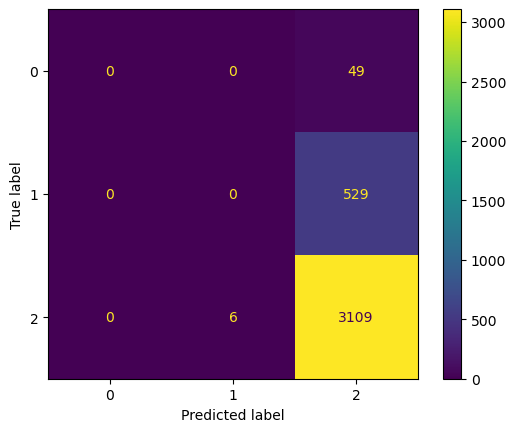

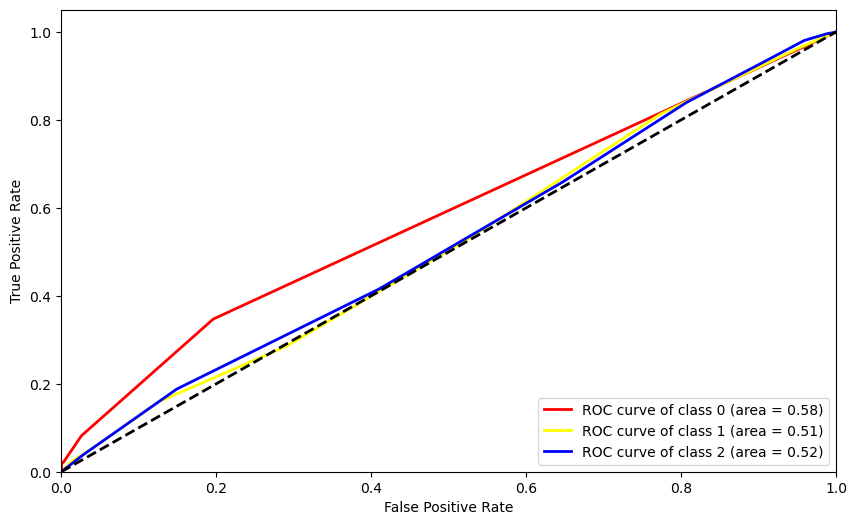

KNN Precision: 0.7114714652885424
KNN Recall: 0.843487679393447
KNN F1 Score: 0.7718754762957072
KNN macro-AUC: 0.5377034712675374
KNN Weighted-AUC: 0.519241418111983



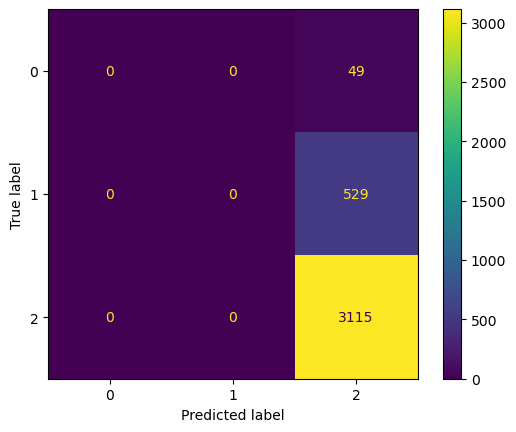

In [792]:
models = {
    'Gradient_Boost': GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy'),
    "Extratrees": ExtraTreesClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=20)
}

for model_name, model in models.items():
    print("##################################################################################")
    print("Model: ", model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred_proba=model.predict_proba(X_test)
    y_pred_proba = np.nan_to_num(y_pred_proba, nan=1/3)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(classification_report(y_test,y_pred))
    macro_auc =  roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    weighted_auc =  roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    plt_auc_curve(y_test,y_pred_proba)
    time.sleep(1)
    print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    time.sleep(2)

    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} macro-AUC: {macro_auc}")
    print(f"{model_name} Weighted-AUC: {weighted_auc}\n")

#### **Task 2.1.1.4:** Analysis for this prediction
##### Gradient Boost has an accuracy of 74%
##### Decision Trees, ETC & KNN has an accuracy of 84%
##### Overall Precision too is in the 70s, 
##### But look at the precision of each class individually, for the classes 0 & 1 ({'fatal injury': 0, 'serious injury': 1, 'slight injury': 2}), precision is close to 0% or 20% (DecisionTreeClassifier). F1-Score is also not good.
##### macro-AUC & weighted-AUC is around 50-60% which is also not good, because our prediction for classes 0,1 is not good.
##### ROC Curve is also not good for each of the algorithm.
##### **Reason/ Mistake:** Just look at the percentage of Target Variable Classes below.

#### **Task 2.1.1.5: Finding the core Reason/ Mistake of failure**

Class = slight injury, n=10408 (84.56%)
Class = serious injury, n=1743 (14.16%)
Class = fatal injury, n=158 (1.28%)


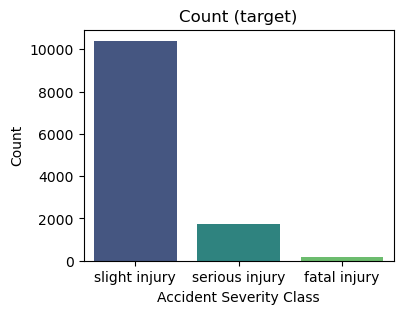

In [795]:
counter = Counter(y)

for k, v in counter.items():
    per = 100*v/len(y)
    print(f"Class = {k}, n={v} ({per:.2f}%)")

target_count = cleaned_dataset['Accident_severity'].value_counts().reset_index()
target_count.columns = ['Accident_severity', 'Count']  # Rename columns for clarity

plt.figure(figsize=(4, 3))
sns.barplot(data=target_count, x='Accident_severity', y='Count', palette="viridis")
plt.title("Count (target)")
plt.xlabel("Accident Severity Class")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keeps x-axis labels horizontal
plt.show()

#### **Task 2.1.1.6: Analysis of Mistake**
##### Look how biased the dataset is toward one of the class.

#### **Task 2.1.1.7: Solution**
##### We can implement Oversampling Technique to make the target variable classes frequency equal.
##### https://www.researchgate.net/publication/340978368_Machine_Learning_with_Oversampling_and_Undersampling_Techniques_Overview_Study_and_Experimental_Results

In [798]:
oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=0)

Class = fatal injury, n=7263 (33.23%)
Class = slight injury, n=7313 (33.46%)
Class = serious injury, n=7280 (33.31%)


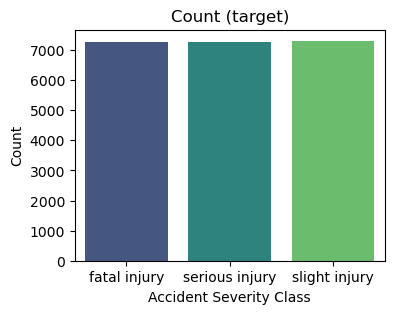

In [799]:
counter = Counter(y_train)

for k, v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class = {k}, n={v} ({per:.2f}%)")

unique, counts = np.unique(y_train, return_counts=True)

target_count = cleaned_dataset['Accident_severity'].value_counts().reset_index()
target_count.columns = ['Accident_severity', 'Count']  # Rename columns for clarity

plt.figure(figsize=(4, 3))
sns.barplot(data=target_count, x=unique, y=counts, palette="viridis")
plt.title("Count (target)")
plt.xlabel("Accident Severity Class")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keeps x-axis labels horizontal
plt.show()

#### **Task 2.1.1.8: Label Encoding for target variable for oversampled data**

In [801]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(class_mapping)

{'fatal injury': 0, 'serious injury': 1, 'slight injury': 2}


In [802]:
counter = Counter(y_train)
for k, v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class = {k}, n={v} ({per:.2f}%)")

Class = 0, n=7263 (33.23%)
Class = 2, n=7313 (33.46%)
Class = 1, n=7280 (33.31%)


#### **Task 2.1.1.9: Now lets Implement our Algorithms once again on oversampled data.**
##### Now our target is not biased and dataset length is around 22K rows**

##################################################################################
Model:  Gradient_Boost
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3145
           1       0.77      0.62      0.69      3128
           2       0.84      0.91      0.87      3095

    accuracy                           0.80      9368
   macro avg       0.80      0.80      0.79      9368
weighted avg       0.80      0.80      0.79      9368



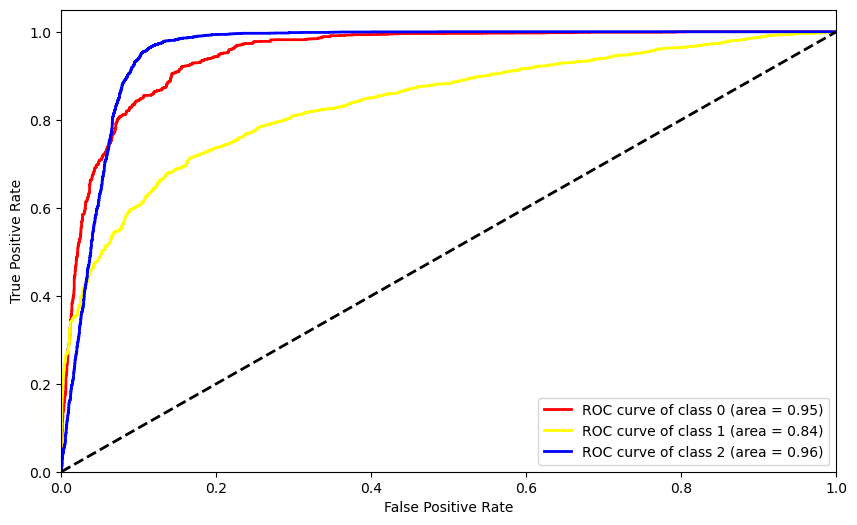

Gradient_Boost Accuracy: 0.8000640478223741
Gradient_Boost Precision: 0.7977203678365506
Gradient_Boost Recall: 0.8000640478223741
Gradient_Boost F1 Score: 0.7946252635415046
Gradient_Boost macro-AUC: 0.9139927552355384
Gradient_Boost Weighted-AUC: 0.9139089423972453

##################################################################################
Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3145
           1       0.76      0.85      0.80      3128
           2       0.84      0.70      0.76      3095

    accuracy                           0.85      9368
   macro avg       0.85      0.85      0.84      9368
weighted avg       0.85      0.85      0.84      9368



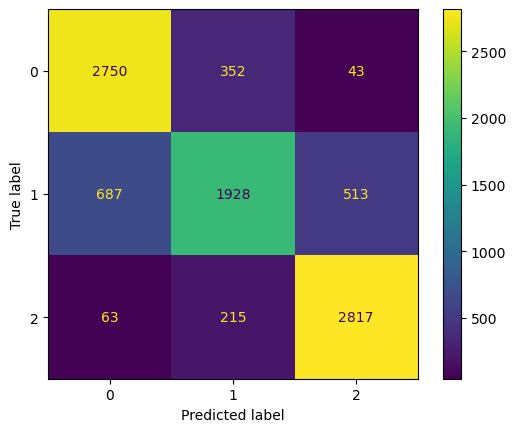

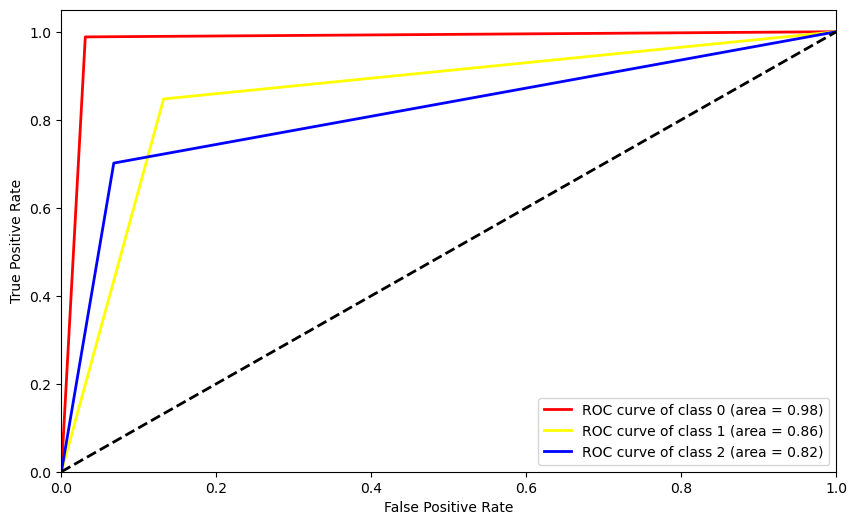

DecisionTreeClassifier Accuracy: 0.8463919726729291
DecisionTreeClassifier Precision: 0.8473609714245119
DecisionTreeClassifier Recall: 0.8463919726729291
DecisionTreeClassifier F1 Score: 0.8439928724737791
DecisionTreeClassifier macro-AUC: 0.8844233961493916
DecisionTreeClassifier Weighted-AUC: 0.8848322120073352

##################################################################################
Model:  Extratrees
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3145
           1       0.95      0.88      0.91      3128
           2       0.87      0.95      0.91      3095

    accuracy                           0.94      9368
   macro avg       0.94      0.94      0.94      9368
weighted avg       0.94      0.94      0.94      9368



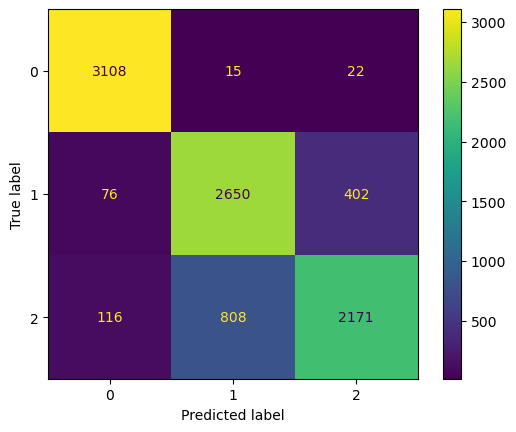

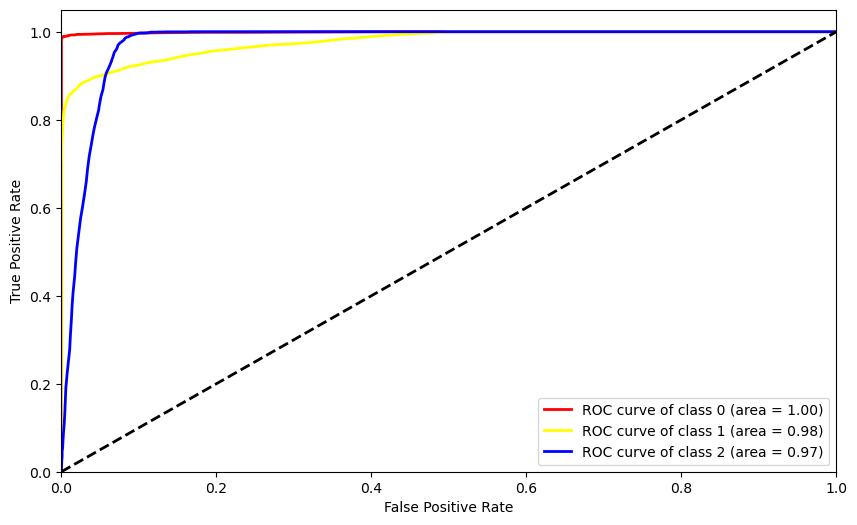

Extratrees Accuracy: 0.9390478223740393
Extratrees Precision: 0.9415115682924191
Extratrees Recall: 0.9390478223740393
Extratrees F1 Score: 0.9391845960888583
Extratrees macro-AUC: 0.9834593226895839
Extratrees Weighted-AUC: 0.9835214680562477

##################################################################################
Model:  KNN
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      3145
           1       0.57      0.84      0.68      3128
           2       0.98      0.06      0.11      3095

    accuracy                           0.63      9368
   macro avg       0.74      0.63      0.53      9368
weighted avg       0.74      0.63      0.53      9368



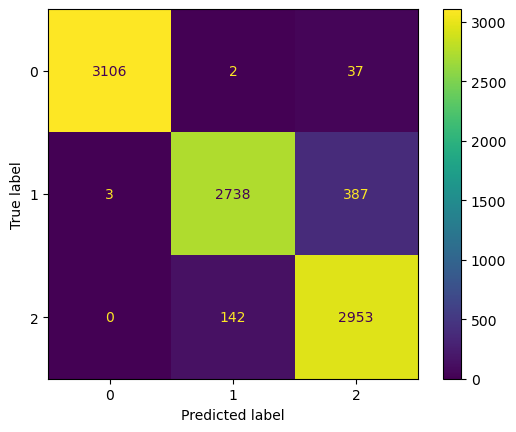

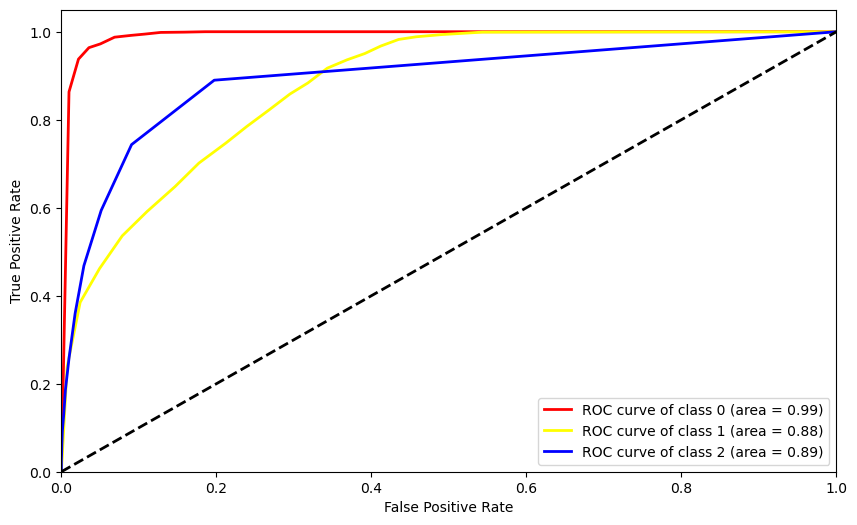

KNN Accuracy: 0.6343936806148591
KNN Precision: 0.7431720667639142
KNN Recall: 0.6343936806148591
KNN F1 Score: 0.5349314887541029
KNN macro-AUC: 0.9206204577358813
KNN Weighted-AUC: 0.920847658007984



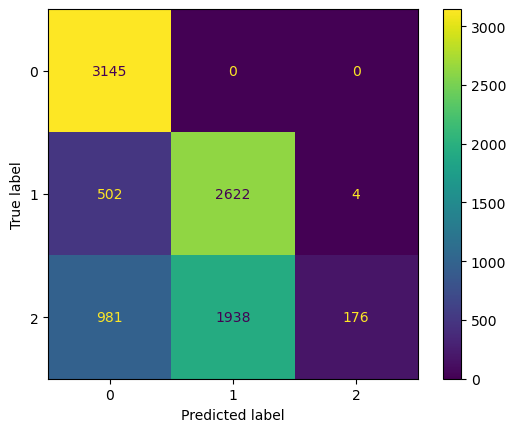

In [804]:
models = {'Gradient_Boost': GradientBoostingClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy'),
          "Extratrees": ExtraTreesClassifier(),
          "KNN": KNeighborsClassifier(n_neighbors=20)
}

for model_name, model in models.items():
    print("##################################################################################")
    print("Model: ", model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred_proba=model.predict_proba(X_test)
    y_pred_proba = np.nan_to_num(y_pred_proba, nan=1/3)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(classification_report(y_test,y_pred))
    macro_auc =  roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    weighted_auc =  roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    plt_auc_curve(y_test,y_pred_proba)
    time.sleep(1)
    print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    time.sleep(2)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} macro-AUC: {macro_auc}")
    print(f"{model_name} Weighted-AUC: {weighted_auc}\n")


#### **Task 2.1.1.10: Analysis of our Algorithms on oversampled data.**
##### Each and every algorithm performed better precision wise for each target class and accuracy for ETC model have drastically increased.
##### For Gradient boost accuracy is increased from 74% to 80%
##### For Decision Trees accuracy remained same 84%.
##### For KNN accuracy is decreased from 84% to 64%. - It might be due to the wrong n_neighbours or k parameter.
##### For ETC accuracy is increased from 84% to 94%
##### AUC scores are also pretty good, & ROC Curve is also better than the previous scenario. 
##### So till now, best performance is done by ETC, but still accuracy is low. How I can improve it? **- Implement Grid CV Search with different configurations**
##### https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

#### **Task 2.1.1.11: Implementing Grid CV Search**
##### To Play more with ML Algorithms, I'm considering some scenarios
##### S1: Playing with different Dataset: Normal Dataset, Oversampled Dataset - 2
##### S2: Playing on weightage assignment & not weightage assignment - 2
##### S3: Considering all the 4 models - 4

##### **So in total, I will be training 4*2*2 = 16 models, but gradient boosting and KNN doesn't support weight assignment, so 16 - 2 -2 = 12 models I will be training** These will be the best model according to the configurations.

#### **Task 2.1.1.12: Creating 2 Datasets & Performing Label Encoding to Target Variable**
##### Normal & Oversampled

In [808]:
# Case 1: Normal Dataset

X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X, y, test_size=0.3, random_state=0)

le = LabelEncoder()
y_test_normal = le.fit_transform(y_test_normal)
y_train_normal = le.fit_transform(y_train_normal)
y_normal = copy.deepcopy(y)

normal_class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [809]:
# Case 2: Oversampling of Data
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(copy.deepcopy(X), copy.deepcopy(y))

X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

oversampling_le = LabelEncoder()
y_test_oversample = oversampling_le.fit_transform(y_test_oversample)
y_train_oversample = oversampling_le.fit_transform(y_train_oversample)

oversampling_class_mapping = dict(zip(oversampling_le.classes_, oversampling_le.transform(le.classes_)))

#### **Task 2.1.1.13: Defining Weights, Configurations, & Different Scenarios**

In [811]:
def compute_class_weights(y):
    class_counts = Counter(y)
    total_samples = len(y)
    num_classes = len(class_counts)

    class_weights = {
        cls: (total_samples/count)
        for cls, count in class_counts.items()
    }

    return class_weights


# Function for GridSearch with Decision Tree
def GridSearch(model, X_train, y_train, X_test, y_test, param_grid):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=2)
    result = grid.fit(X_train, y_train)
    return grid, result

# Class weights for normal and oversampled datasets (Using same weights for oversampling)
class_weights_normal = compute_class_weights(y_train_normal)

print("Normal Target Mapping", normal_class_mapping)
print("Oversampling Target Mapping", oversampling_class_mapping)
print("class_weights_normal: ", class_weights_normal)

scenarios = {
    "Normal_without_weights": (X_train_normal, y_train_normal, X_test_normal, y_test_normal, None),
    "Normal_with_weights": (X_train_normal, y_train_normal, X_test_normal, y_test_normal, class_weights_normal),
    "Oversampled_without_weights": (X_train_oversample, y_train_oversample, X_test_oversample, y_test_oversample, None),
    "Oversampled_with_weights": (X_train_oversample, y_train_oversample, X_test_oversample, y_test_oversample, class_weights_normal)
}

Normal Target Mapping {'fatal injury': 0, 'serious injury': 1, 'slight injury': 2}
Oversampling Target Mapping {'fatal injury': 0, 'serious injury': 1, 'slight injury': 2}
class_weights_normal:  {2: 1.181406828465652, 1: 7.097199341021417, 0: 79.04587155963303}


In [812]:
grid_models = {
 'Gradient_Boost': {
     "param_grid": {
         'max_depth': [10, 20],
        'max_features': ['sqrt', 'log2']
     },
    'model': GradientBoostingClassifier()
  },
'ETC': {
    "param_grid": {
         'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'max_features': ['sqrt', 'log2'],
          'criterion': ['gini', 'entropy']
     },
    'model': ExtraTreesClassifier()
  },
'Decision_Trees': {
    "param_grid": {
         'criterion': ['gini', 'entropy'],
         'max_depth': [None, 10, 20, 30, 40, 50]
     },
    'model': DecisionTreeClassifier()

  },
'KNN': {
    "param_grid": {
       'n_neighbors': [1,2,3,4,5,10,20]
     },
    'model': KNeighborsClassifier()
  }
}

#### **Task 2.1.1.14: Training the Model & Storing the Models & their Results in Pickle File**
#### Why I'm storing? - It took take 5 hours for training

In [814]:
def train_with_grid():
    # Iterate through each scenario and train/evaluate model
    for model_name in grid_models:
        print("Model Name: ", model_name)
        for scenario, (X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, weights) in scenarios.items():
            print(f"\n\n--- Scenario: {scenario} ---")
            print(X_train_scenario.shape, y_train_scenario.shape, X_test_scenario.shape, y_test_scenario.shape, weights)
            start_time = datetime.now()
            param_grid={}
            param_grid = grid_models[model_name]['param_grid']
            model = grid_models[model_name]['model']

            if model_name in ['KNN', 'Gradient_Boost'] and scenario in ['Normal_with_weights', 'Oversampled_with_weights']:
                continue #KNN doesn't support weights

            if weights:
                param_grid['class_weight'] = [weights]
            else:
                if model_name not in ['KNN', 'Gradient_Boost']:
                    print("Hurrah")
                    param_grid['class_weight'] = [None]

            if model_name in ['KNN', 'Gradient_Boost']:
                if 'class_weight' in param_grid:
                    del param_grid['class_weight']

            grid_search, results = GridSearch(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, param_grid)

            best_model = grid_search.best_estimator_

            with open(f'{model_name}_{scenario}.pkl', 'wb') as file:
                pickle.dump(best_model, file)
                print(f"Model saved as {model_name}_{scenario}.pkl")

            with open(f'{model_name}_{scenario}_results.pkl', 'wb') as file:
                pickle.dump(results, file)
                print(f"Model saved as {model_name}_{scenario}_results.pkl")

            # Print the execution time in minutes
            print(f"Execution time: {(datetime.now() - start_time).total_seconds()} seconds")
    time.sleep(5)
# Uncomment Below to train the models - Might gonna take 5 hours
# train_with_grid()

#### **Task 2.1.1.15: Analysis of all the grid Models**

In [816]:
def display_metrics(_model, results):
    print("------------------  Grid Search Output  ------------------")
    print('Best Score:', results.best_score_)
    print('Best Hyperparameters: ', results.best_params_)
    print("------------------   Prediction Starts    ------------------")
    y_pred = _model.predict(X_test)
    print("MCC:", matthews_corrcoef(y_test, y_pred))
    print('Precision Score : ' + str(precision_score(y_test, y_pred, average="weighted")))
    print('Recall Score : ' + str(recall_score(y_test, y_pred, average="weighted")))
    print('F1 Score : ' + str(f1_score(y_test, y_pred, average="weighted")))
    print(classification_report(y_test, y_pred))


In [ ]:
for model_name in grid_models:
    for scenario, (X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, weights) in scenarios.items():
        if model_name in ['KNN', 'Gradient_Boost'] and scenario in ['Normal_with_weights', 'Oversampled_with_weights']:
                continue #doesn't support weights
        print(f"\n\n--- Model Name: {model_name} Scenario: {scenario} ---")
        print(X_train_scenario.shape, y_train_scenario.shape, X_test_scenario.shape, y_test_scenario.shape, weights)
        start_time = datetime.now()
        with open(f'{model_name}_{scenario}.pkl', 'rb') as file:
            _model = pickle.load(file)
            with open(f'{model_name}_{scenario}_results.pkl', 'rb') as results_file:
                results = pickle.load(results_file)
            display_metrics(_model, results)

            y_pred = _model.predict(X_test_scenario)
            y_pred_proba=_model.predict_proba(X_test_scenario)
            print(ConfusionMatrixDisplay.from_predictions(y_test_scenario,y_pred))
            plt_auc_curve(y_test_scenario, y_pred_proba)
            time.sleep(2)

#### **Task 2.1.1.15: Analysis of all the grid Models**
##### As expected, None of the models have performed well in case of Normal Dataset.
##### **Gradient Boost:**
##### Oversampling Accuracy got increased to 96%, Precision is 96% and is around all the classess, Best Hyperparameters(Oversampling):  {'max_depth': 10, 'max_features': 'sqrt'}. Mathew Coefficient is also close to 94% which indicates that prediction is excellent.
##### **Decision Trees:**
##### A good thing happend with DC, In case of Normal Dataset, Accuracy (41%, 57%) & Precision is better in case where weights are assigned. There is no effect of weight in case of Oversampled Dataset. Accuracy has been increased to 94%, Precision is 90% in case of Oversampling by selecting the Best Hyperparameters(Oversampling):  {'class_weight': {2: 1.181406828465652, 1: 7.097199341021417, 0: 79.04587155963303}, 'criterion': 'gini', 'max_depth': None}. MCC is also very good.
##### **KNN:**
##### Oversampling Accuracy got increased to 93%, Precision is 93% and is around all the classess, Best Hyperparameters(Oversampling):  {'max_depth': 10, 'max_features': 'sqrt'}. Mathew Coefficient is also close to 90% which indicates that prediction is very good.
##### **Extra Trees Classifier (ETC):**
##### Oversampling Accuracy got increased to 97%, Precision is 97% and is around all the classess, Best Hyperparameters(Oversampling):  {'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}. Mathew Coefficient is also close to 96-97% which indicates that prediction is excellent. There is almost No effect of weights in both Normal & Oversampled Accuracy.

#### **Task 2.1.1.16: Feature Importance Analysis using ML Models**
##### Let see the important features of our ML Models
##### As we know form the results, I will be going analysis of oversampled Dataset ML Models.
##### KNN doesn't support feature importance method because it is non-parametric algorithm and depends upon only distance

In [ ]:
feature_scores = defaultdict(int)
for model_name in grid_models:
    print("##############################################################")
    if model_name not in ['KNN']:
        for scenario, (X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, weights) in scenarios.items():
            if scenario in ['Oversampled_without_weights']:
                if model_name in ['KNN', 'Gradient_Boost'] and scenario in ['Normal_with_weights', 'Oversampled_with_weights']:
                        continue #doesn't support weights
                print(f"\n--- Model Name: {model_name} Scenario: {scenario} ---")
                print(X_train_scenario.shape, y_train_scenario.shape, X_test_scenario.shape, y_test_scenario.shape, weights)
                start_time = datetime.now()
                with open(f'{model_name}_{scenario}.pkl', 'rb') as file:
                    _model = pickle.load(file)
                    best_features = _model.feature_importances_
                    indices = np.argsort(best_features)[-20:]

                    for rank, idx in enumerate(indices, 1): 
                        feature_name = features[idx]
                        weighted_score = rank * best_features[idx]
                        feature_scores[feature_name] += weighted_score

                    top_features = [features[i] for i in indices]
                    
                    plt.figure(figsize=(10, 8))
                    plt.barh([features[i] for i in indices], best_features[indices], color="royalblue")
                    plt.xlabel("Feature Importance")
                    plt.title(f"Top 20 Important Features {model_name}")
                    plt.show()
                    time.sleep(1)

#### So the above 3 bar graphs shows the top 20 features of maximum importance for predicting the accident severity.

#### **Task 2.1.1.17: Getting Top 10 features accross all models based on their ranks in respective models**

In [ ]:
top_combined_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)[:12]

print("Top 12 Features by Weighted Importance Score:")
for feature, score in top_combined_features:
    print(f"Feature: {feature}, Score: {score}")

In [ ]:
top_features, top_scores = zip(*top_combined_features)
data = pd.DataFrame({"Feature": top_features, "Score": top_scores})

plt.figure(figsize=(12, 8))
sns.barplot(x="Feature", y="Score", data=data, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for readability
plt.xlabel("Feature")
plt.ylabel("Cumulative Weighted Score")
plt.title("Top 12 Features by Cumulative Weighted Score Across Models")
plt.tight_layout() 
plt.show()

#### So the above bar graph shows the top 10 features of maximum importance for predicting the accident severity across all models.

## **Task 2.2: Problem Statement Analysis using ML Models**
### See there are two ways of analysing the results, Say I want to analyse 3 features (Driving Experience, Road Surface Conditions, and Education on Accident Severity) in Problem Statement 1 & analyze 4 features (Lightning Conditions, Weather Conditions, Type of Collision, and Day of the Week), 
#### Case 1: Consider the overall features and compare with them that how much important these features with respect to overall features.
#### Case 2: Consider only features to do analysis and comapre the importance among themselves only.

### **Task 2.2.1: Problem Statement 1 Analysis using ML Models**

##### **Case 1 (Overall):** 
##### Driving Experience is ranked 3rd in  Gradient Boost,4th in Decision Trees & 5th in ETC. As all models have performed well, so Driving Experience is very important as it is the 3rd overall across all the models. So 5-10 years of experience have caused more accidents.
##### Education is 15th in Gradient Boost, 14th in ETC and 9th in Decision Trees. Overall it is 11th Important across models. So it is moderately important. So Junior High School Education level is the cause of severity majorly. 
##### Road Surface Conditions is not that much important when analyzing the severity because it is not important enough in ETC & Gradient & Not import across overall Model Feature Importance(Top 12 Features - Not Present) 

In [ ]:
for model_name in grid_models:
    if model_name not in ['KNN']:
        for scenario, (X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, weights) in scenarios.items():
            if scenario in ['Oversampled_without_weights']:
                if model_name in ['KNN', 'Gradient_Boost'] and scenario in ['Normal_with_weights', 'Oversampled_with_weights']:
                    continue #doesn't support weights
                if model_name not in ['KNN']:
                    print(f"\n\n--- Model Name: {model_name} Scenario: {scenario} ---")
                    print(X_train_scenario.shape, y_train_scenario.shape, X_test_scenario.shape, y_test_scenario.shape, weights)
                    start_time = datetime.now()
                    with open(f'{model_name}_{scenario}.pkl', 'rb') as file:
                        _model = pickle.load(file)
        
                        importance_1 = _model.feature_importances_
                        feature_importances_1 = dict(zip(features, importance_1))
                        filtered_importance_1 = [feature_importances_1[feat] for feat in features_to_be_analyzed_for_problem_statement_1 if feat in feature_importances_1]

                        plt.figure(figsize=(5, 3))
                        sns.barplot(
                            x=features_to_be_analyzed_for_problem_statement_1, 
                            y=filtered_importance_1, 
                            palette="viridis" 
                        )
                        plt.title("Feature Importances for Driving Experience, Road Surface Conditions, and Education on Accident Severity")
                        plt.xlabel("Feature")
                        plt.ylabel("Importance")
                        plt.xticks(rotation=45)
                        plt.show()


##### **Case 2 (Among each other):** Consider only features to do analysis and comapre the importance among themselves only.
##### Well, here also analysis is almost similar among the models, all the models have shown driving experience 1st priority, moderately priority is given to education level and least to Road Surface Conditions

### **Task 2.2.2: Problem Statement 2 Analysis using ML Models**

In [ ]:
for model_name in grid_models:
    if model_name not in ['KNN']:
        for scenario, (X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario, weights) in scenarios.items():
            if scenario in ['Oversampled_without_weights']:
                if model_name in ['KNN', 'Gradient_Boost'] and scenario in ['Normal_with_weights', 'Oversampled_with_weights']:
                    continue #doesn't support weights
                if model_name not in ['KNN']:
                    print(f"\n\n--- Model Name: {model_name} Scenario: {scenario} ---")
                    print(X_train_scenario.shape, y_train_scenario.shape, X_test_scenario.shape, y_test_scenario.shape, weights)
                    start_time = datetime.now()
                    with open(f'{model_name}_{scenario}.pkl', 'rb') as file:
                        _model = pickle.load(file)
        
                        importance_2 = _model.feature_importances_
                        feature_importances_2 = dict(zip(features, importance_2))
                        filtered_importance_2 = [feature_importances_2[feat] for feat in features_to_be_analyzed_for_problem_statement_2 if feat in feature_importances_2]
                        plt.figure(figsize=(10, 6))
                        sns.barplot(x=filtered_importance_2, y=features_to_be_analyzed_for_problem_statement_2)
                        plt.title("Feature Importances for Lightning Conditions, Weather Conditions, Type of Collision, and Day of the Week on Accident Severity")
                        plt.xlabel("Importance")
                        plt.ylabel("Feature")
                        plt.show()


##### **Case 1 & Case 2 Combined (Becasue the result contains 22 features comparison:** 
##### Day of the Week is ranked 1st in each of the ML model. Infact it is the most important feature for severity of accidents. So Weekends are the main cause of the accidents.
##### Lightning Conditions in Daylight is 4th in Gradient Boost, 2nd in ETC and 6th in Decision Trees. Overall it is 5th Important across models. So it is quite important. **Major Accidents happens in Daylight not at Night or Midnight - Less Traffic Might be the reasons - Might be doing it in Phase3 if allowed** - **Confirming the EDA Done Before**
##### Type of the collion with another vehicles is ranked 3rd among each model, and ranked 10th overall in terms of importance, that means accidence occurance is moderately affected by collisions with another vehicle.

### **Task 2.2.3: ** Intelligence from application of the algorithms
#### Policies Should me make directly:
#### 1. Weekends days are major cause of accidents, Increase the number of police checkpoints and patrols on weekends, especially in areas with high accident rates.
#### 2. We should Implement mandatory road safety and awareness programs in junior high schools
#### 3. The goverment Introduce incentives for regular vehicle servicing as servicing of the vehicle is the 4th most important feature across Models
#### 4. Require or incentivize drivers with 5-10 years of driving experience to participate in defensive driving courses every few years.

### ------------------------------------------------------------- The END ----------------------------------------------------------------------